In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##### each column have datatype as int or float instead of object as its already encoded

---
## 1.1 **Data Dictionary** 

1. age: age in years
2. sex: sex 
    * 1 = male
    * 0 = female
3. cp: chest pain type
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) 
    * 1 = true; 
    * 0 = false
7. restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina 
    * 1 = yes
    * 0 = no
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * Value 0: upsloping
    * Value 1: flat
    * Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy    (if 4 so its error drop it)
13. thal: 
    * 0 = `error (in the original dataset 0 maps to NaN's)`
    * 1 = fixed defect
    * 2 = normal 
    * 3 = reversable defect 
14. target (the lable): 
    * 0 = no disease, 
    * 1 = disease
---    

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.shape

(303, 14)

In [7]:
df = df[df['ca'] < 4] #drop the wrong ca values
df = df[df['thal'] > 0] # drop the wrong thal value

In [8]:
df.shape

(296, 14)

##### rename shortform columns name to fullform for more understanding

In [9]:
df = df.rename(
    columns = {'cp':'chest_pain_type', 
               'trestbps':'resting_blood_pressure', 
               'chol': 'cholesterol',
               'fbs': 'fasting_blood_sugar',
               'restecg' : 'resting_electrocardiogram', 
               'thalach': 'max_heart_rate_achieved', 
               'exang': 'exercise_induced_angina',
               'oldpeak': 'st_depression', 
               'slope': 'st_slope', 
               'ca':'num_major_vessels', 
               'thal': 'thalassemia'}, 
    errors="raise")

In [10]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##### converting encoder to (string)object for better clarity

In [11]:
# Sex
df['sex'] = df['sex'].map({0: 'female', 1: 'male'})

# Chest pain type
df['chest_pain_type'] = df['chest_pain_type'].map({
    0: 'typical angina',
    1: 'atypical angina',
    2: 'non-anginal pain',
    3: 'asymptomatic'
})

# Fasting blood sugar
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({
    0: 'lower than 120mg/ml',
    1: 'greater than 120mg/ml'
})

# Resting electrocardiogram
df['resting_electrocardiogram'] = df['resting_electrocardiogram'].map({
    0: 'normal',
    1: 'ST-T wave abnormality',
    2: 'left ventricular hypertrophy'
})

# Exercise induced angina
df['exercise_induced_angina'] = df['exercise_induced_angina'].map({
    0: 'no',
    1: 'yes'
})

# ST slope
df['st_slope'] = df['st_slope'].map({
    0: 'upsloping',
    1: 'flat',
    2: 'downsloping'
})

# Thalassemia
df['thalassemia'] = df['thalassemia'].map({
    1: 'fixed defect',
    2: 'normal',
    3: 'reversable defect'
})

In [12]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,asymptomatic,145,233,greater than 120mg/ml,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        296 non-null    int64  
 1   sex                        296 non-null    object 
 2   chest_pain_type            296 non-null    object 
 3   resting_blood_pressure     296 non-null    int64  
 4   cholesterol                296 non-null    int64  
 5   fasting_blood_sugar        296 non-null    object 
 6   resting_electrocardiogram  296 non-null    object 
 7   max_heart_rate_achieved    296 non-null    int64  
 8   exercise_induced_angina    296 non-null    object 
 9   st_depression              296 non-null    float64
 10  st_slope                   296 non-null    object 
 11  num_major_vessels          296 non-null    int64  
 12  thalassemia                296 non-null    object 
 13  target                     296 non-null    int64  
dtyp

##### there is no nan values and now dtypes are int float and object

In [14]:
df.describe()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target
count,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,131.60473,247.155405,149.560811,1.059122,0.679054,0.540541
std,9.059471,17.72662,51.977011,22.970792,1.166474,0.939726,0.499198
min,29.000000,94.00000,126.000000,71.000000,0.000000,0.000000,0.000000
25%,48.000000,120.00000,211.000000,133.000000,0.000000,0.000000,0.000000
50%,56.000000,130.00000,242.500000,152.500000,0.800000,0.000000,1.000000
75%,61.000000,140.00000,275.250000,166.000000,1.650000,1.000000,1.000000
max,77.000000,200.00000,564.000000,202.000000,6.200000,3.000000,1.000000


##### there are few outliers in st_depression and cholesterol but can be possible in real high-risk cases

In [15]:
df['target'].value_counts()

target
1    160
0    136
Name: count, dtype: int64

<Axes: ylabel='count'>

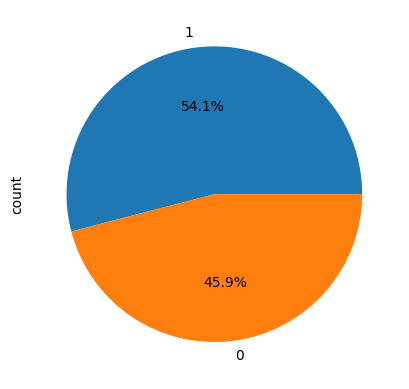

In [16]:
df['target'].value_counts().plot(kind='pie',autopct='%0.1f%%')

* The dataset contains 296 records, indicating a small-sized medical dataset suitable for binary classification.
* The average age of patients is around 55 years, with most patients lying between 48 and 61 years.
* Resting blood pressure has a mean of approximately 132 mmHg, which falls in the pre-hypertensive range for many patients.
* The cholesterol levels show high variability, with values ranging from 126 to 564, indicating the presence of clinically valid extreme cases.
* The maximum heart rate achieved varies widely (71 to 202 bpm), suggesting differences in individual cardiovascular fitness.
* ST depression values range from 0 to 6.2, where higher values represent severe myocardial ischemia, making this feature an important predictor.
* The number of major vessels ranges from 0 to 3, with most patients having 0 or 1 affected vessel.
* The target variable is almost balanced, with approximately 54% positive cases (1) and 46% negative cases (0).

In [17]:
df.sample(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
225,70,male,typical angina,145,174,lower than 120mg/ml,ST-T wave abnormality,125,yes,2.6,upsloping,0,reversable defect,0
277,57,male,atypical angina,124,261,lower than 120mg/ml,ST-T wave abnormality,141,no,0.3,downsloping,0,reversable defect,0
101,59,male,asymptomatic,178,270,lower than 120mg/ml,normal,145,no,4.2,upsloping,0,reversable defect,1
91,57,male,typical angina,132,207,lower than 120mg/ml,ST-T wave abnormality,168,yes,0.0,downsloping,0,reversable defect,1
21,44,male,non-anginal pain,130,233,lower than 120mg/ml,ST-T wave abnormality,179,yes,0.4,downsloping,0,normal,1


In [18]:
pd.crosstab(df['sex'],df['target'],normalize='columns')*100

target,0,1
sex,,
female,17.647059,44.375
male,82.352941,55.625


In [19]:
pd.crosstab(df['chest_pain_type'],df['target'],normalize='columns')*100

target,0,1
chest_pain_type,,
asymptomatic,5.147059,10.000
atypical angina,6.617647,25.000
non-anginal pain,13.235294,40.625
typical angina,75.000000,24.375


<Axes: xlabel='target', ylabel='chest_pain_type'>

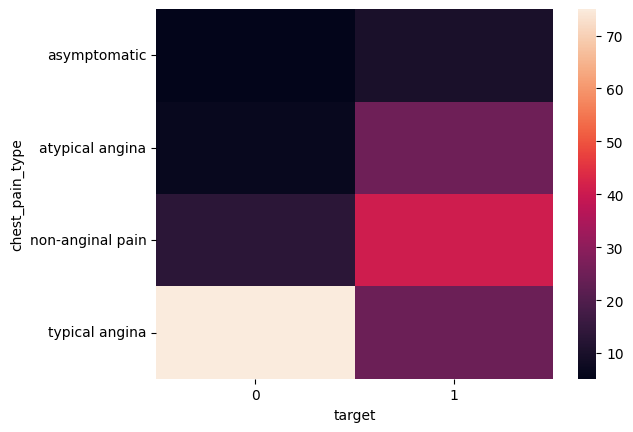

In [20]:
sns.heatmap(pd.crosstab(df['chest_pain_type'],df['target'],normalize='columns')*100)

<Axes: xlabel='target', ylabel='sex'>

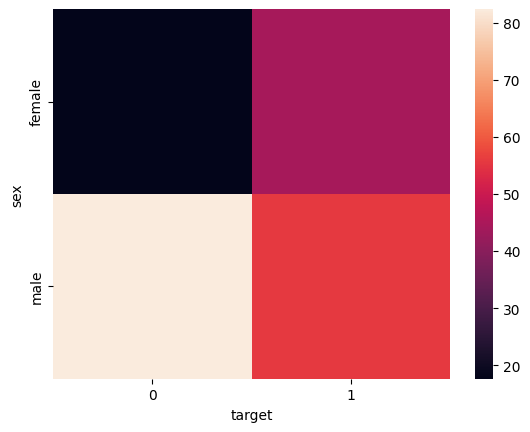

In [21]:
sns.heatmap(pd.crosstab(df['sex'],df['target'],normalize='columns')*100)

In [22]:
df['sex'].value_counts()

sex
male      201
female     95
Name: count, dtype: int64

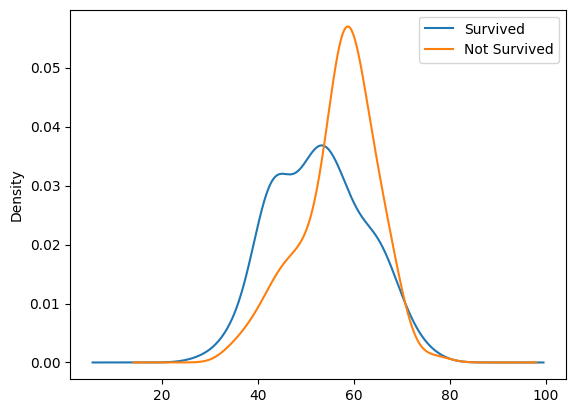

In [23]:
df[df['target'] == 1]['age'].plot(kind='kde',label='Survived')
df[df['target'] == 0]['age'].plot(kind='kde',label='Not Survived')

plt.legend()
plt.show()

In [24]:
df[df['age'] == 60]

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_electrocardiogram,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
82,60,female,non-anginal pain,102,318,lower than 120mg/ml,ST-T wave abnormality,160,no,0.0,downsloping,1,normal,1
136,60,female,non-anginal pain,120,178,greater than 120mg/ml,ST-T wave abnormality,96,no,0.0,downsloping,0,normal,1
147,60,female,asymptomatic,150,240,lower than 120mg/ml,ST-T wave abnormality,171,no,0.9,downsloping,0,normal,1
174,60,male,typical angina,130,206,lower than 120mg/ml,normal,132,yes,2.4,flat,2,reversable defect,0
176,60,male,typical angina,117,230,greater than 120mg/ml,ST-T wave abnormality,160,yes,1.4,downsloping,2,reversable defect,0
186,60,male,typical angina,130,253,lower than 120mg/ml,ST-T wave abnormality,144,yes,1.4,downsloping,1,reversable defect,0
193,60,male,typical angina,145,282,lower than 120mg/ml,normal,142,yes,2.8,flat,2,reversable defect,0
194,60,male,non-anginal pain,140,185,lower than 120mg/ml,normal,155,no,3.0,flat,0,normal,0
201,60,male,typical angina,125,258,lower than 120mg/ml,normal,141,yes,2.8,flat,1,reversable defect,0
207,60,female,typical angina,150,258,lower than 120mg/ml,normal,157,no,2.6,flat,2,reversable defect,0


In [25]:
df[df['target'] == 1]['age'].mean()

np.float64(52.64375)

In [26]:
df[df['target'] == 0]['age'].mean()

np.float64(56.73529411764706)

<Axes: >

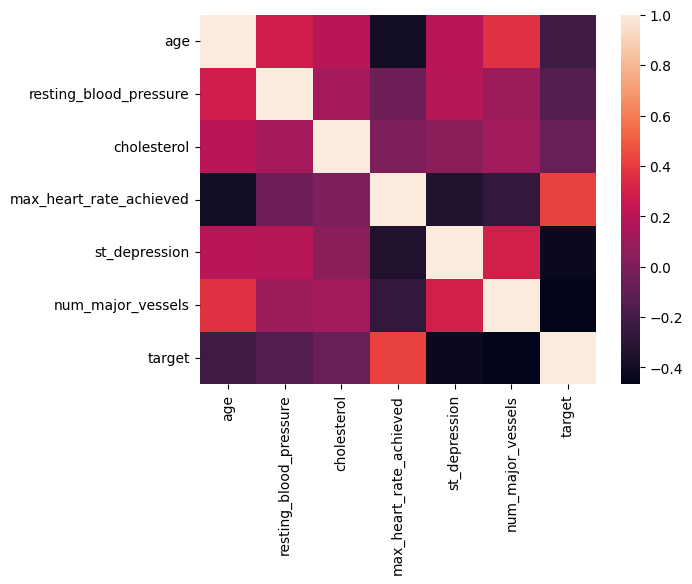

In [27]:
sns.heatmap(df.corr(numeric_only=True))

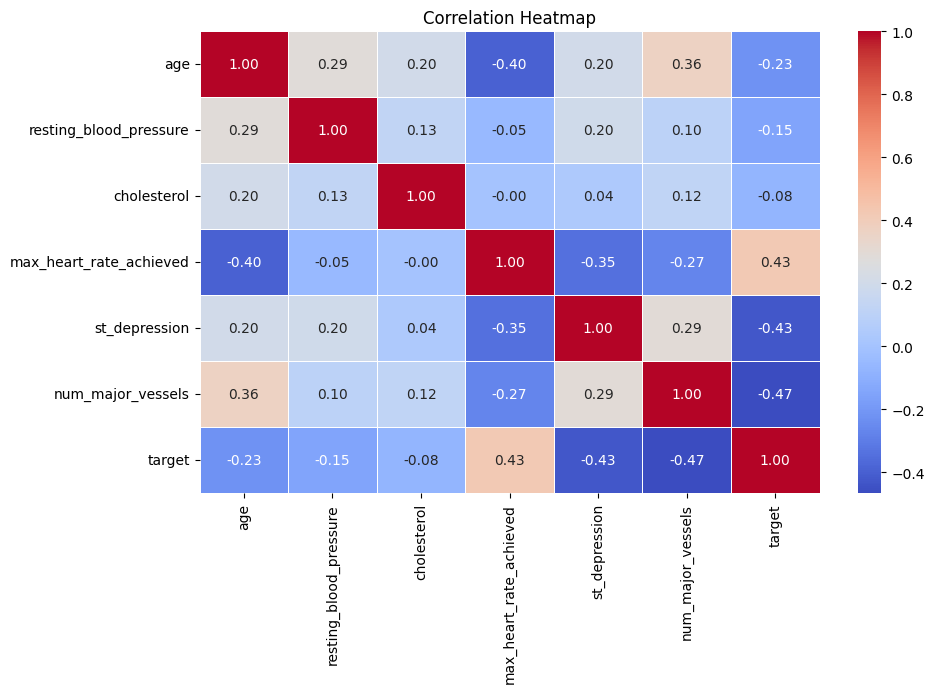

In [28]:
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10,6))
sns.heatmap(
    corr,
    annot=True,        # shows numbers
    fmt=".2f",         # 2 decimal places
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap")
plt.show()

##### The features are mostly independent, and variables like max heart rate, ST depression, and number of major vessels play a more significant role in predicting heart disease.

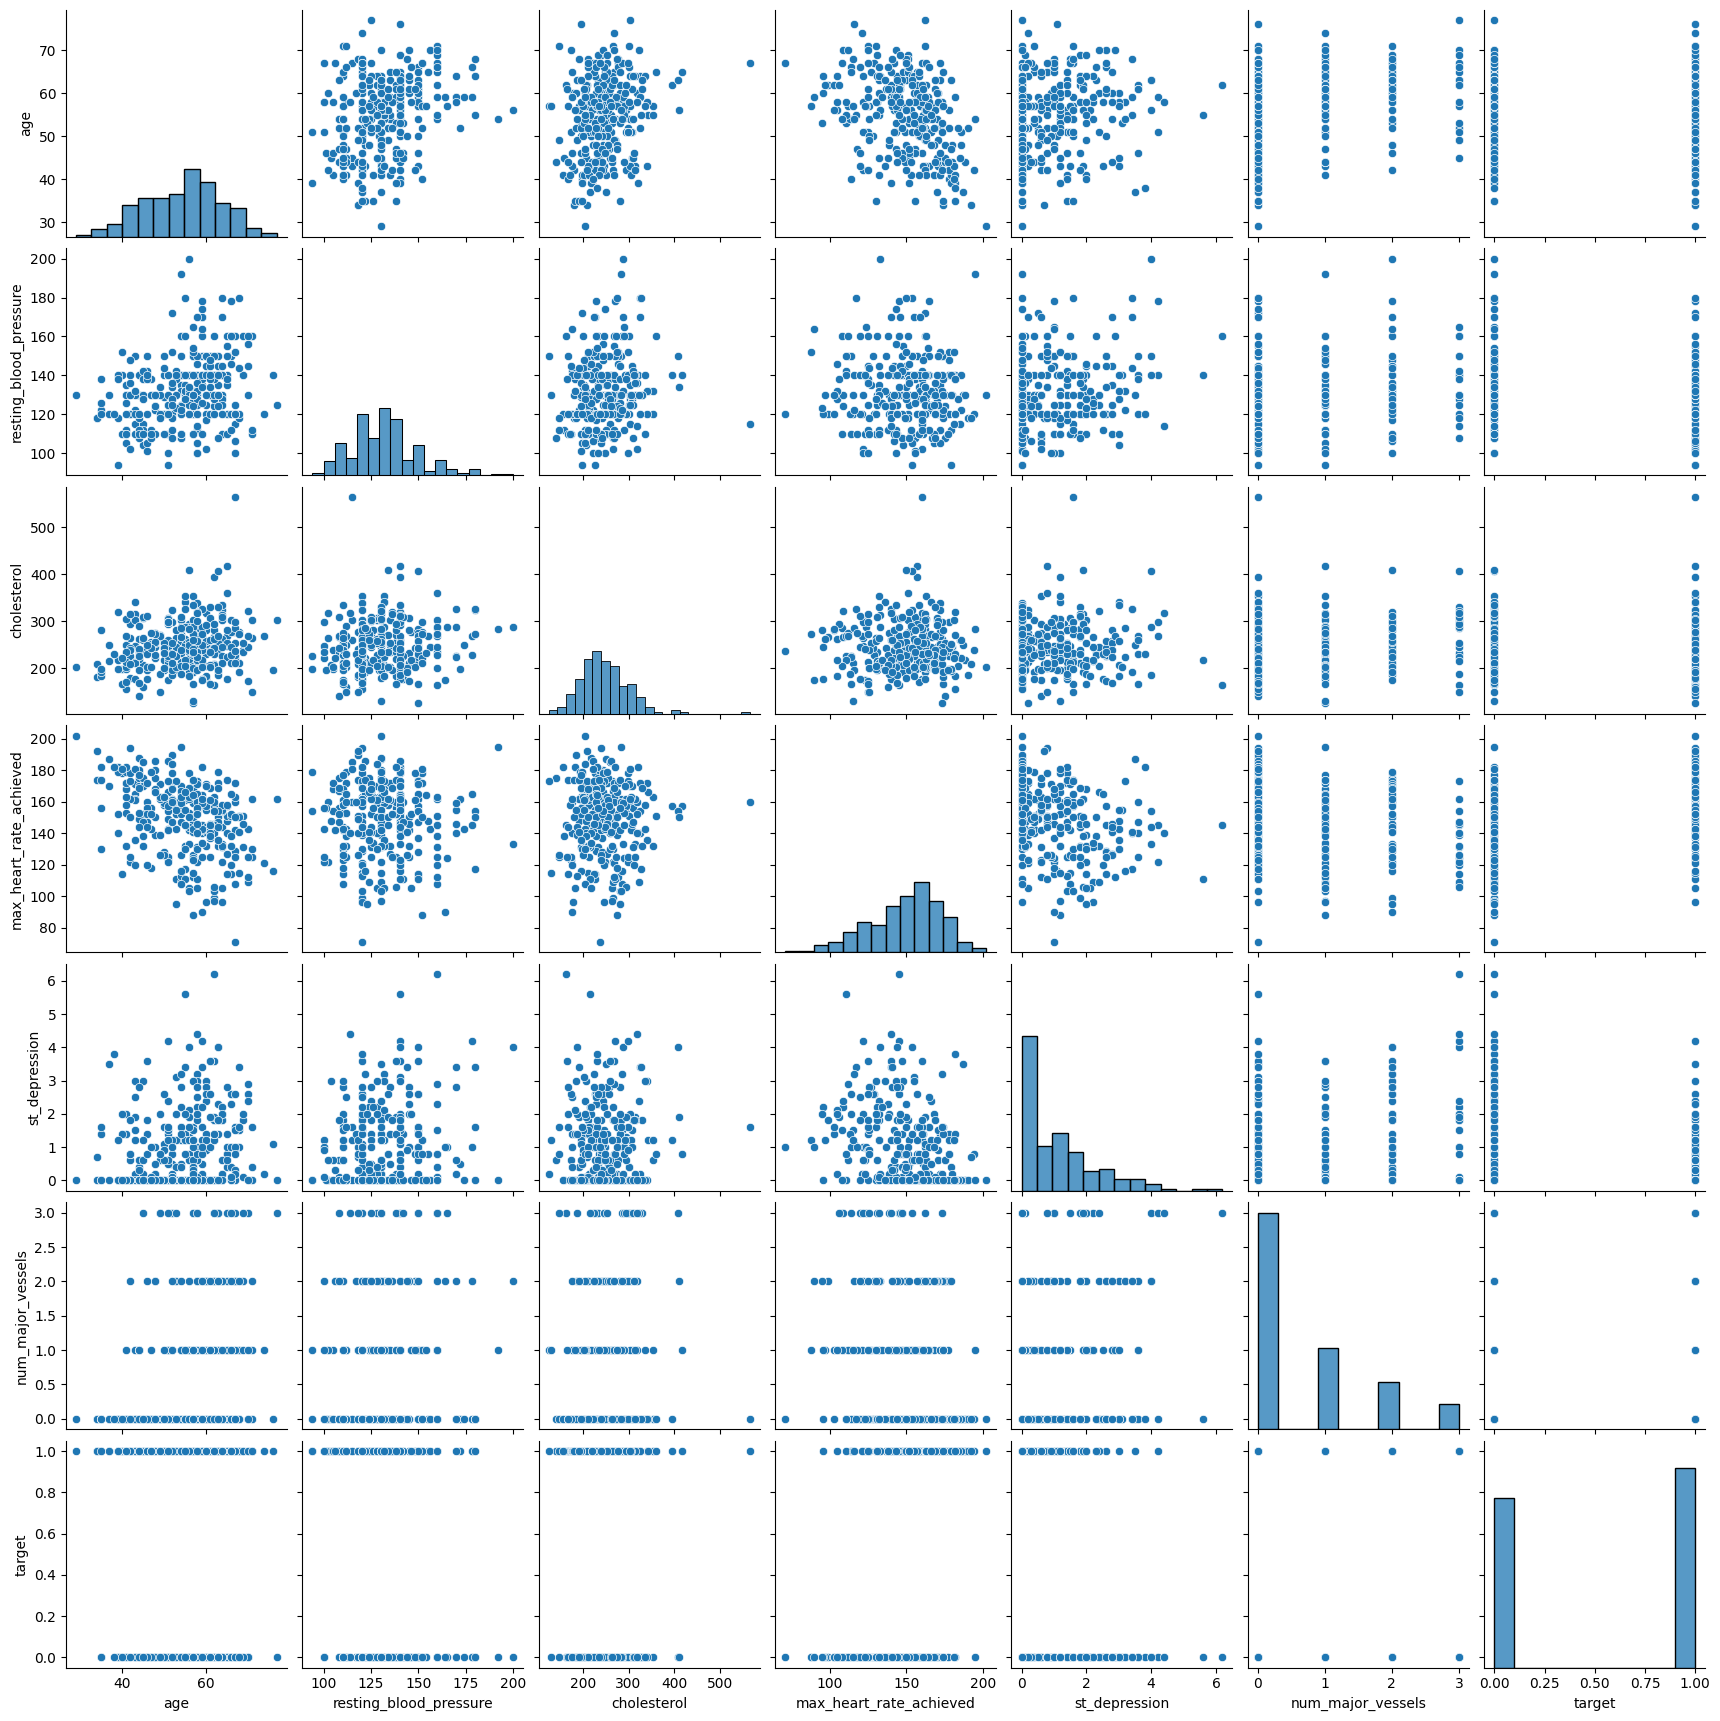

In [29]:
sns.pairplot(df)

* Most features show no strong linear relationship with each other.
* Max heart rate achieved and ST depression show noticeable patterns with the target, indicating good predictive potential.
* Cholesterol and resting blood pressure are widely spread and show weak direct relationships.
* Number of major vessels appears discrete and shows clear separation with the target.
* The target variable is well distributed, indicating suitability for classification.

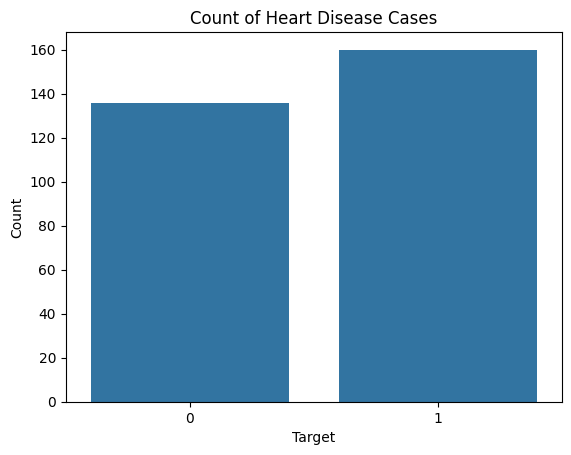

In [30]:
sns.countplot(x='target', data=df)
plt.title('Count of Heart Disease Cases')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

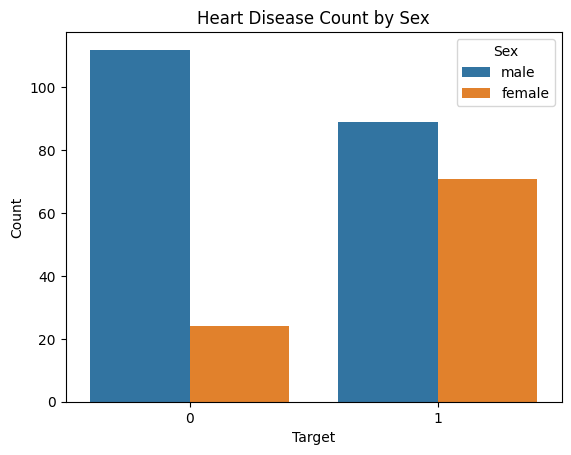

In [31]:
sns.countplot(x='target', hue='sex', data=df)
plt.title('Heart Disease Count by Sex')
plt.xlabel('Target')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

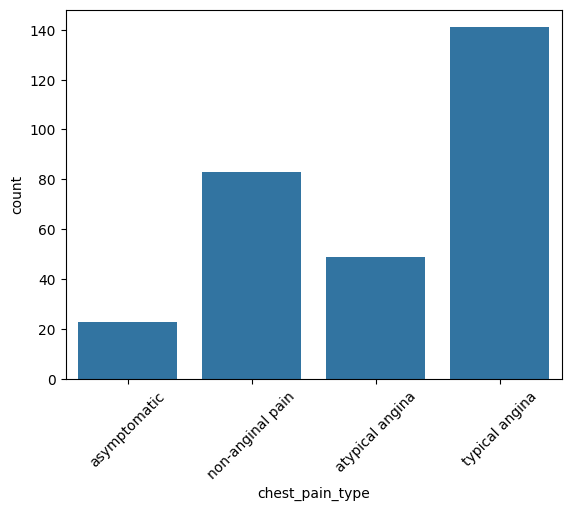

In [32]:
sns.countplot(x='chest_pain_type', data=df)
plt.xticks(rotation=45)
plt.show()

* Task: Binary Classification (0 / 1)
* Dataset size: ~300 rows → SMALL dataset
* Domain: Medical (heart disease)

So priorities are:
* good generalization
* low overfitting
* explainability (important in medical projects)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

In [34]:
X = df.drop('target', axis=1)
y = df['target']

In [35]:
num_cols = X.select_dtypes(include='number').columns
cat_cols = X.select_dtypes(exclude='number').columns

In [36]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ]
)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
### logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

Logistic Regression Accuracy: 0.8166666666666667


In [41]:
### SVM

In [42]:
from sklearn.svm import SVC

In [43]:
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': ['scale', 0.01, 0.1, 0.001]
}

svm_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

grid = GridSearchCV(
    svm_pipe,
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


Best Parameters: {'classifier__C': 1, 'classifier__gamma': 0.01}
Best CV Accuracy: 0.8601063829787232


In [44]:
svm_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', C=1, gamma=0.01))
])

svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

SVM Accuracy: 0.8


In [45]:
### Random Forest as a bagging-based ensemble

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
param_grid = {
    'classifier__n_estimators': [75, 100, 200],
    'classifier__max_depth': [None, 5, 10],
}

rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        random_state=42
    ))
])

grid_rf = GridSearchCV(
    rf_pipe,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'classifier__max_depth': [None, 5, ...], 'classifier__n_estimators': [75, 100, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : t

In [48]:
best_rf = grid_rf.best_estimator_

y_pred = best_rf.predict(X_test)

print("Best Parameters:", grid_rf.best_params_)
print("CV Accuracy:", grid_rf.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'classifier__max_depth': 5, 'classifier__n_estimators': 100}
CV Accuracy: 0.8349561830574489
Test Accuracy: 0.8


In [49]:
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.8


“Since the dataset is small (~300 samples) and the problem is binary medical classification,
I used Logistic Regression as a baseline, SVM for margin-based learning,
and Random Forest as a bagging-based ensemble to reduce overfitting.
Boosting was avoided because it may overfit on small medical datasets.”

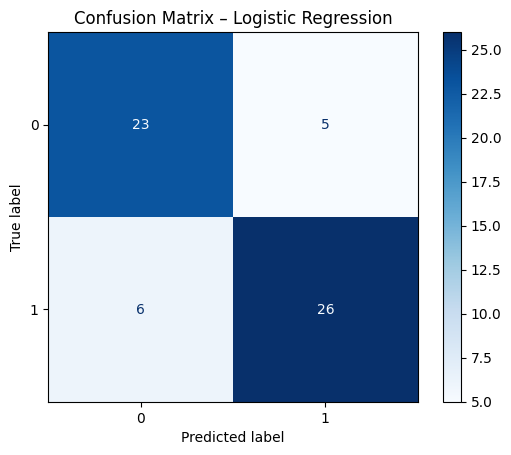

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, lr_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[0, 1]
)

disp.plot(cmap='Blues')
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

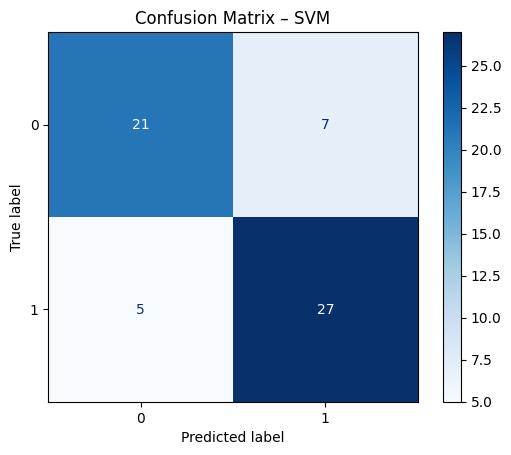

In [51]:
cm = confusion_matrix(y_test, svm_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[0, 1]
)

disp.plot(cmap='Blues')
plt.title("Confusion Matrix – SVM")
plt.show()

In [52]:
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

y_pred_04_rf = (y_prob_rf >= 0.4).astype(int)

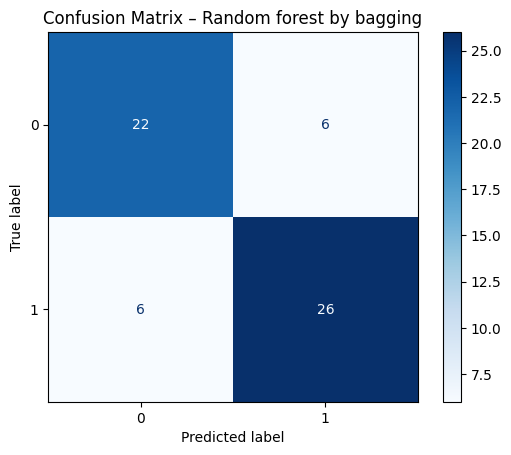

In [53]:
cm = confusion_matrix(y_test, rf_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[0, 1]
)

disp.plot(cmap='Blues')
plt.title("Confusion Matrix – Random forest by bagging")
plt.show()

* TP (True Positive) → correctly predicted heart disease ✅
* FN (False Negative) → heart disease predicted as healthy ❌ (MOST DANGEROUS)
* FP (False Positive) → healthy predicted as disease
* TN (True Negative) → correctly predicted healthy
* 
In heart disease prediction, minimizing false negatives is critical, as failing to detect a diseased patient can lead to serious consequences.

In [54]:
LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [61]:
y_prob = lr_model.predict_proba(X_test)[:, 1]

y_pred_04 = (y_prob >= 0.4).astype(int)

Threshold tuning was applied to reduce false negatives, making the model safer for medical decision support.

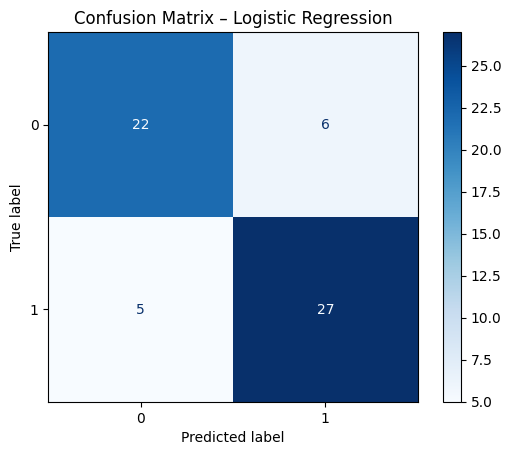

In [56]:
cm=confusion_matrix(y_test, y_pred_04)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[0, 1]
)

disp.plot(cmap='Blues')
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

In [57]:
from sklearn.metrics import classification_report

print("Logistic Regression")
print(classification_report(y_test, lr_pred))

print("SVM")
print(classification_report(y_test, svm_pred))

print("Random Forest")
print(classification_report(y_test, rf_pred))


Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.81      0.83        32

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60

SVM
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.79      0.84      0.82        32

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60

Random Forest
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.81      0.81      0.81        32

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80   

Recall for class 1 (heart disease) is MOST important

(False Negative = very risky)

SVM detects the most heart disease patients

##### Logistic Regression provides a balanced performance with good recall, higher overall accuracy, and better interpretability, which is crucial for medical decision-support systems.Logistic Regression achieved the best balance between accuracy (81.6%), recall, and false negative rate. Since medical datasets prioritize interpretability and minimizing false negatives, Logistic Regression was selected as the final model.

In [58]:
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

Logistic Regression Accuracy: 0.8166666666666667


In [66]:
final_model = lr_model
final_model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [67]:
y_prob = final_model.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= 0.4).astype(int)

In [69]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        28
           1       0.82      0.84      0.83        32

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.82        60
weighted avg       0.82      0.82      0.82        60

[[22  6]
 [ 5 27]]


In [70]:
lr_model.named_steps['classifier'].coef_

array([[ 0.19332965, -0.11601066, -0.24823295,  0.55371834, -0.39285924,
        -1.32574693, -1.16002059, -0.38386383,  0.25870756, -0.9777504 ,
        -0.24643451, -0.20244919, -0.10238734, -0.81920642, -0.71915617,
        -0.16506723,  0.74184536, -0.76562482]])

In [87]:
new_patient = pd.DataFrame([{
    'age': 56,
    'sex': 'male',
    'chest_pain_type': 'atypical angina',
    'resting_blood_pressure': 120,
    'cholesterol': 236,
    'fasting_blood_sugar': 'lower than 120mg/ml',
    'resting_electrocardiogram': 'ST-T wave abnormality',
    'max_heart_rate_achieved': 178,
    'exercise_induced_angina': 'no',
    'st_depression': 0.8,
    'st_slope': 'downsloping',
    'num_major_vessels': 0,
    'thalassemia': 'normal'
}])

final_model.predict(new_patient)

array([1])

In [88]:
prob = final_model.predict_proba(new_patient)[0][1]

print("Heart Disease Probability:", round(prob, 2))
print("Prediction:", 1 if prob >= 0.4 else 0)

Heart Disease Probability: 0.95
Prediction: 1


In [85]:
new_patient = pd.DataFrame([{
    'age': 57,
    'sex': 'male',
    'chest_pain_type': 'typical angina',
    'resting_blood_pressure': 130,
    'cholesterol': 131,
    'fasting_blood_sugar': 'lower than 120mg/ml',
    'resting_electrocardiogram': 'ST-T wave abnormality',
    'max_heart_rate_achieved': 115,
    'exercise_induced_angina': 'yes',
    'st_depression': 1.2,
    'st_slope': 'flat',
    'num_major_vessels': 1,
    'thalassemia': 'reversable defect'
}])

final_model.predict(new_patient)

array([0])

In [86]:
prob = final_model.predict_proba(new_patient)[0][1]

print("Heart Disease Probability:", round(prob, 2))
print("Prediction:", 1 if prob >= 0.4 else 0)

Heart Disease Probability: 0.03
Prediction: 0


In [89]:
import pickle

with open("heart_disease_model.pkl", "wb") as f:
    pickle.dump(final_model, f)